In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ニューラルネットワーク構築
activation = nn.Softmax(dim=0)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(300, 4, bias=False)
        
    def forward(self, input):
        output = self.layer1(input) #loss_entropy = nn.CrossEntropyLoss()上で与える予測値はソフトマックス関数により処理されるのでこの行でソフトマックスをかける必要はない
        return output
    
model = NeuralNetwork()

In [3]:
#データの取得
def X_FromcsvTotensor(file):
    result = np.loadtxt(file + '.csv')
    result = torch.from_numpy(result.astype(np.float32)) 
    return result

def Y_FromcsvTotensor(file):
    result = np.loadtxt(file + '.csv')
    result = torch.from_numpy(result.astype(np.int64)) 
    return result

X_train = X_FromcsvTotensor('X_train')
Y_train = Y_FromcsvTotensor('Y_train')
X_valid = X_FromcsvTotensor('X_valid')
Y_valid = Y_FromcsvTotensor('Y_valid')

In [4]:
#損失関数の定義
loss_entropy = nn.CrossEntropyLoss()

#最適化手法の決定
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

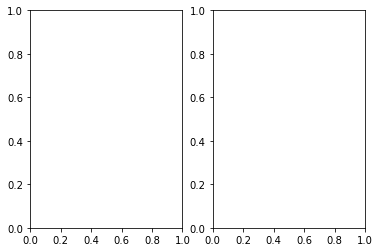

In [5]:
#グラフの設定
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

In [6]:
EPOCHS = 100  # 2000回繰り返す
epoch_train_list, loss_train_list, accuracy_train_list = [], [], []
epoch_valid_list, loss_valid_list, accuracy_valid_list = [], [], []

for epoch in range(EPOCHS):
    optimizer.zero_grad()  # 重みとバイアスの更新で内部的に使用するデータをリセット
    outputs = model(X_train)  # 手順1：ニューラルネットワークにデータを入力
    loss = loss_entropy(outputs, Y_train)  # 手順2：正解ラベルとの比較
    loss.backward()  # 手順3-1：誤差逆伝播
    optimizer.step()  # 手順3-2：重みとバイアスの更新

    #訓練データでの正解率と損失の計算
    number = 0
    for i in range(len(X_train)):
        if torch.argmax(activation(model(X_train[i]))) == Y_train[i]:
            number += 1
        
    #エポック、損失、正解率をリストに格納
    epoch_train_list.append(epoch+1)
    loss_train_list.append(loss.detach().numpy())
    accuracy_train_list.append(number/len(X_train))

    #評価データでの正解率と損失の計算
    number = 0
    for i in range(len(X_valid)):
        if torch.argmax(activation(model(X_valid[i]))) == Y_valid[i]:
            number += 1 

    outputs = model(X_valid)  # 手順1：ニューラルネットワークにデータを入力
    loss = loss_entropy(outputs, Y_valid) 
    
    #エポック、損失、正解率をリストに格納
    epoch_valid_list.append(epoch+1)
    loss_valid_list.append(loss.detach().numpy())
    accuracy_valid_list.append(number/len(X_valid))

In [7]:
ax1.plot(epoch_train_list, accuracy_train_list, label='train_accuracy')
ax2.plot(epoch_train_list, loss_train_list, label='train_loss')
ax1.plot(epoch_valid_list, accuracy_valid_list, label='valid_accuracy')
ax2.plot(epoch_valid_list, loss_valid_list, label='valid_loss')

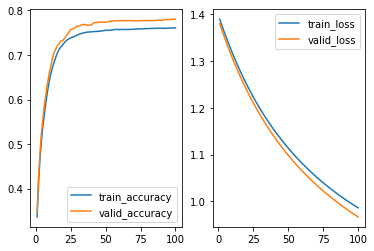

In [8]:
ax1.legend()
ax2.legend()
fig